<a href="https://colab.research.google.com/github/woodjmichael/PV-based-systems-lab/blob/main/Neural%20Network%20Regression%20Seminar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neural Network Forecast Seminar**

> PV-Based Systems Lab
> 
> Michael Wood, PhD Candidate
> 
> 2024-3-22

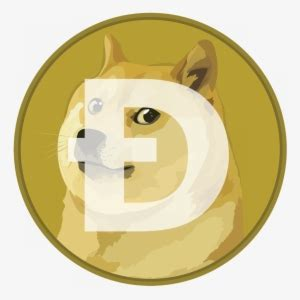

---


# Objectives

1. Learn the basic function of an artificial neuron
2. Perform the math of an artificial neuron
3. See how to prepare data for supervised learning
4. Train neural network and analyze results
5. See how hyperparameters change results
6. Basic familiarity with python and Google Colab

# Basics of Forecasting

### Big Ideas

- **Forecasting**: predict future patterns from past ones
- Assume patterns in the past data will continue in the future
  - For **linear growth** (e.g. italy population last 300 years), use a linear forecast model
  - For **exponential growth** (e.g. global average temperature), use an exponential forecast model
  - For **constant statistical variation** (e.g. coin toss), use a statistical model

![](https://cienciadedatos.net/images/forecasting_multi-step_en.gif)

_(src Skforecast)_

### Time series
- **Time series:** a dataset where values are indexed according to time, often at a fixed interval
  - E.g. Each day we get a new price of a cryptocurrency


### Regression

| |Input|Output|Example|
|---|---|---|---|
|Regression|x|y|Use current temperature to predict current Uber rides|
|Auto-regression|past y|future y|Use past Uber rides to predict future Uber rides|




# Neural Networks

![](https://news.mit.edu/sites/default/files/styles/news_article__image_gallery/public/images/202211/MIT-Neural-Networks-01_0.gif?itok=JNbooIWQ)

_MIT Study Urges Caution When Comparing Neural Networks to Brain (src MIT News)_

### Big ideas
- Type of machine learning model _inspired_ by brain neurons
- Single neuron is simple: weighted sum, then a nonlinear output filter
- Network is just many neurons in parallel and multiple layers
- More neurons -> more complexity -> more ["emergent behavior"](https://photos.app.goo.gl/nq9yhxSx3UfCAKsv5)
- **Not** always better for forecasting than..
  - Traditional methods (e.g. linear regression)
  - Simple baseline models (e.g. persistence, $y(t+1) = y(t)$ )

### Artificial neuron

![](https://cdn.hashnode.com/res/hashnode/image/upload/v1671022628036/8ZZPKZRdW.gif?auto=format,compress&gif-q=60&format=webm)

_(src Adarsh Bhadauria's Blog)_

Natural and artifical neurons both:
- Have multiple inputs, single output (but can go to multiple other neurons)
- Do weighted sum on inputs
- Do "Processing" (nonlinear output filter)

### Activation function

- It's a "non-linear output filter"
    - Non-linear because double the input does not necesssarily mean double the output

There are many activation functions
 - ReLU (rectified linear unit): very fast to calculate
 - Sigmoid (σ): useful for error back propagation

 Activation functions are especially important regarding training.

 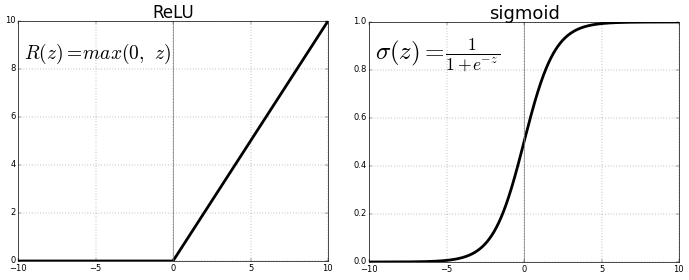

### Single neuron

- Note that the activation function operator (e.g. σ)

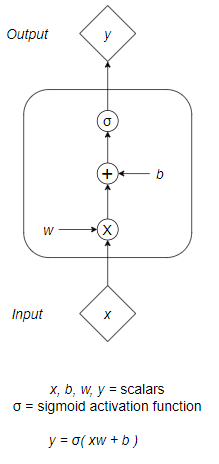

### Multiple neurons (network)

- Each input is typically given to each neuron
- Each neuron still only produces one output
- Each neuron has their own separate weights and biases

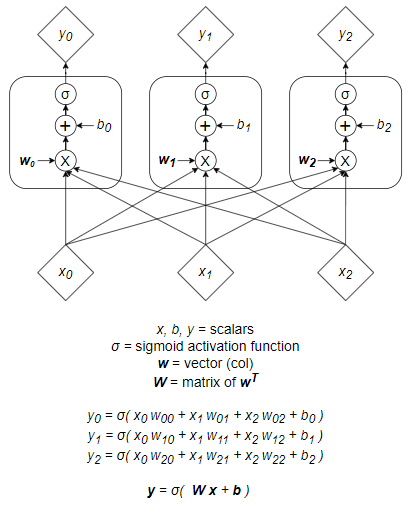

### Mutiple layers

- Now when we add a new layer we truly start to see emergent behavior. 
- The outputs ($y_0$, etc) of the first layer A are just inputs to the next layer B

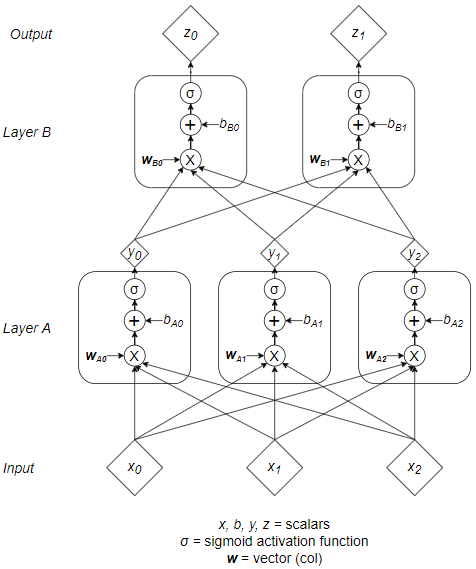

### Training

Linear fit

- You've probably done a simple 2D linear regression in Excel: $y=wx+b$
- [What if it was 3D? ](https://setosa.io/ev/ordinary-least-squares-regression/): $y=w_0 x_0 + w_1 x_1 + b$
- Now try to imagine `N`D

Fitting neural network

- Similar idea to linear fit but:
  - Many more weights and biases
  - Non-linear
- Instead of least squares need: backward propogation of errors and gradient decent
  - Too big of a topic to cover here

## Hyper parameters

_Hyper, from Ancient Greek: "over"_

- Parameters
  - Weights $w_0, w_1, ..$
  - Biases $b_0, ...$
- Hyper parameters
  - Number of layers
  - Numbers of neurons in each layer
  - Activation function used
  - Etc

### Numerical example

- This is just calculating the outputs
- Not doing training calculation

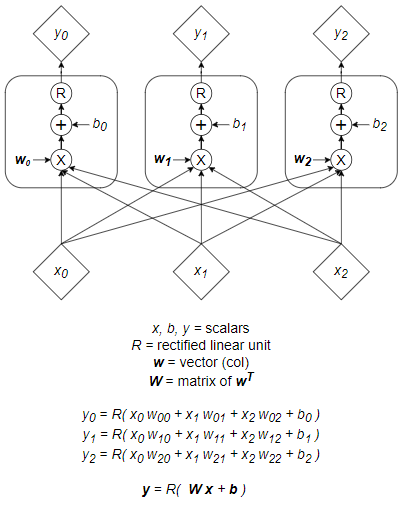

Model 
- neurons (units) = 3
- layers = 1
- inputs = 3
- outputs = 3
- activation function = ReLU

In [1]:
# Rectified linear unit
def R(x_in):
    return max(x_in,0)

Inputs

In [2]:
x0 = 10
x1 = 15
x2 = 20

Weights and biases

In [3]:
w00 = 0.25
w01 = 0.50
w02 = 0.75
w10 = 0.33
w11 = 0.33
w12 = 0.33
w20 = 0.0
w21 = 0.0
w22 = -1.0
b0 = 1.5
b1 = 1.6
b2 = 1.7


Calculations

In [4]:
y0 = R(x0*w00 + x1*w01 + x2*w02 + b0)
y0

26.5

In [5]:
y1 = R(x0*w10 + x1*w11 + x2*w12 + b1)
y1

16.450000000000003

In [6]:
y2 = R(x0*w20 + x1*w21 + x2*w22 + b2)
y2

0

# Python Packages

In [7]:
import pandas as pd   
import numpy as np

import tensorflow as tf
from keras.models import Sequential as create_model
from keras.layers import Dense as layer

from matplotlib.pyplot import plot, show, legend, xlabel, ylabel, title

np.random.seed(42) 
tf.random.set_seed(42)

2024-03-20 16:38:43.975280: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-20 16:38:43.975673: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-20 16:38:43.978608: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-20 16:38:44.012545: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2024-03-20 16:38:44.568011: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Functions

Feel welcome to ignore these.

In [8]:
def import_data(filename):
  df = pd.read_csv('DOGE-USD.csv', index_col=0, parse_dates=True).loc['2023','close'].to_frame()  
  df.columns = ['Price']
  df = df.tz_convert(None).sort_index()  
  return df

def convert_X_and_y_to_numpy():
  global X_train, y_train, X_test, y_test
  X_train,y_train = np.array(X_train), np.array(y_train) 
  X_test,y_test = np.array(X_test), np.array(y_test) 

def add_third_dimension_to_X():  
  global X_train, X_test, L_w
  # reshape X to proper 3D array
  X_train = X_train.reshape((len(X_train), L_w, 1)) 
  X_test = X_test.reshape((len(X_test), L_w, 1))   
  
def plot_data(a,labelA,b,labelB,first_day=0):
  mse = np.square(a-b).mean()**0.5
  t = range(first_day,first_day+len(a))
  plot(t,a,    label=labelA)
  plot(t,b, label=labelB) 
  legend()
  xlabel('Day of year 2021')
  ylabel('Price')
  title(f'Square Root of Mean Squared Error (RMSE): {mse:.4f}')  
  show() 

def plot_training(training):
  loss = training.history['loss'][10:]
  plot(range(10,len(loss)+10), loss, label='Training Loss')
  legend()
  xlabel('Epochs after 10')
  ylabel('MSE')
  show()  

# Data

Upload

`DOGE-USD.csv`

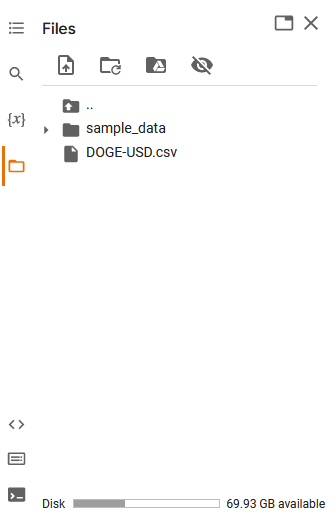

Import

In [9]:
data = import_data('DOGE-USD.csv')

data # colab will print this

,Price
timeOpen,
2023-01-01,0.071454
2023-01-02,0.071454
2023-01-03,0.070468
2023-01-04,0.073237
2023-01-05,0.071550
...,...
2023-12-27,0.093579
2023-12-28,0.091884
2023-12-29,0.091038


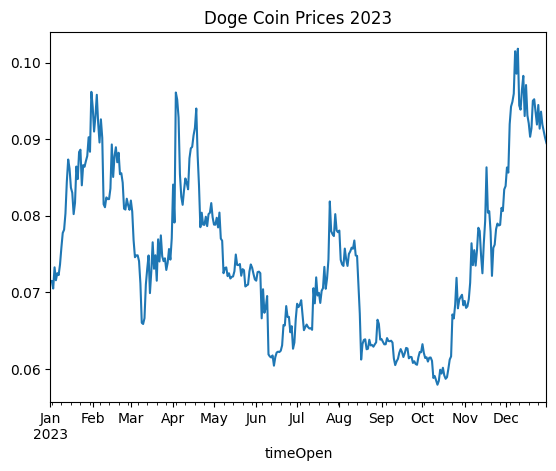

In [10]:
data.Price.plot(title='Doge Coin Prices 2023');

### Train vs Test

- When we test the model's performance, we want it to be on data that it never saw during training, otherwise we dont know if the model just memorized the data.
- The `train` subset will be the first 90% of the days in our dataset
- Then see how well it performs on the `test` subset (remainging 10%)



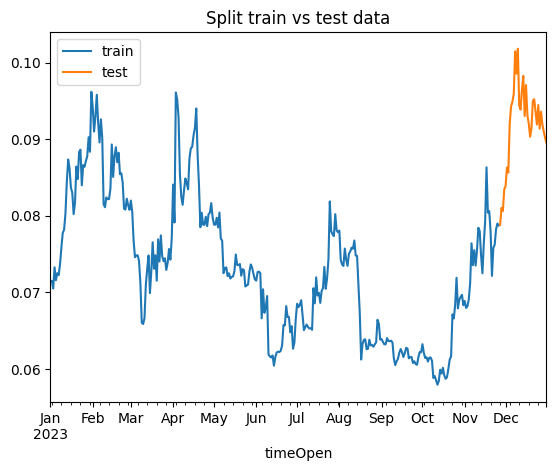

In [11]:
pd.DataFrame({'train':data.Price[:330],
              'test':data.Price[330:]})\
    .plot(title='Split train vs test data');

In [12]:
train = data.Price[0:330].values 
test  = data.Price[330:365].values 

### Supervised learning

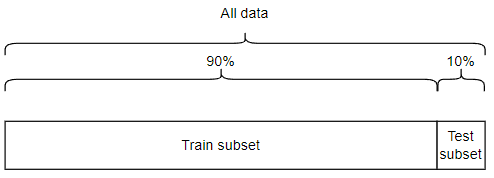

We need to organize the train and test data such that the
- input $X$ to the model is 14 days of data
- and the output $y$ is the 15th day

$X$ is a matrix where
- first row is the first 14 day _window_
- next row is the window _slid_ or shifted ahead one day
- and so on

$y$
- $y$ is just a vector for single-point forecasts
  - e.g. I input 14 data points, my model outputs only 1 data points
  - multi-point e.g.: I input 14 data points, my model outputs 3 data points
- $\hat{y}$ just means the estimated (by the model) value

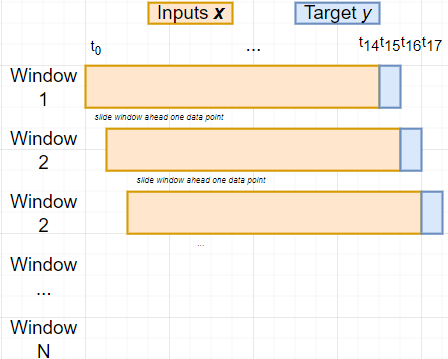

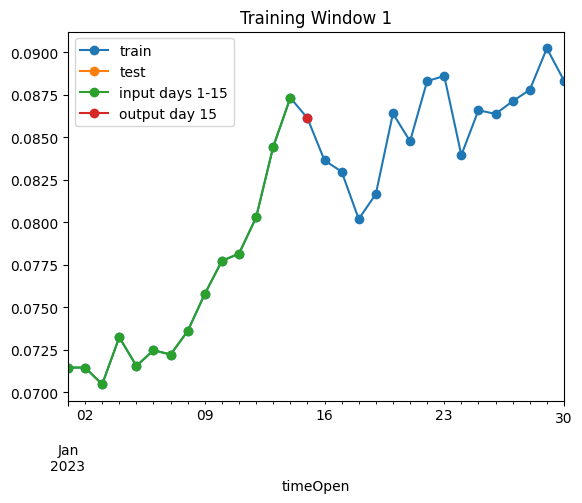

In [13]:
w = 1 # >= 1

pd.DataFrame({'train':data.Price[:300],'test':data.Price[300:],
              f'input days {w}-{w+14}':data.Price[w-1:w+13],
             f'output day 15':data.Price[w+13:w+14]})[:30]\
                  .plot(title=f'Training Window {w}',marker='o',linestyle='-');

Train subset

In [14]:
L_w = 14      # window length (days)

X_train = []  # empty list
y_train = []

window_begin = 0                  # t0..
window_end = window_begin + L_w   #     ..t13

while window_end < len(train):
  new_window = train[window_begin:window_end] # nb: python indexing
  X_train.append(new_window)

  target = train[window_end]
  y_train.append(target)

  window_begin += 1 # slide window 1 day
  window_end += 1 # slide window 1 day


Test subset

In [15]:
X_test = []
y_test = []

window_begin = 0
window_end = window_begin + L_w

while window_end < len(test):
  inputs = test[window_begin:window_end] # nb: python indexing
  X_test.append(inputs)

  target = test[window_end]
  y_test.append(target)

  window_begin += 1 # slide window 1 day
  window_end += 1 # slide window 1 day

A couple annoying things

In [16]:
convert_X_and_y_to_numpy()
add_third_dimension_to_X()

# Forecast model (10 neurons)



### Build

- Build the model with a main ANN layer
  - and then one final neuron to reduce the output values to a single number
- Need to choose the number of layers and number of neurons in each layer
- Since we only predict one future day, out last layer is always one neuron (one output)
- To train the model we'll use `sgd` (stochastic gradient descent)
- Like a linear fit, our loss metric is `mse` (mean squared error)

Visual reminder:

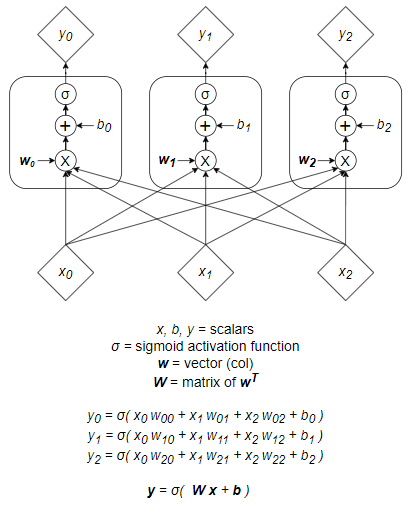

In [17]:
N_neurons = 10

ann1 = create_model()

ann1.add(layer(N_neurons, activation='relu', input_dim=L_w))

ann1.add(layer(1)) # output layer must have a single neuron to predict one day

ann1.compile(optimizer = 'sgd', loss = 'mse', )

ann1.summary()

/home/mjw/miniconda3/envs/tf/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161 (644.00 B)

 Trainable params: 161 (644.00 B)

 Non-trainable params: 0 (0.00 B)

### Train

Train (fit) the model on the training data for 100 epochs (cycles throught the entire dataset). This will perform backpropagation through time.

Epoch 1/500


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0269  
Epoch 2/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - loss: 0.0117
Epoch 3/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - loss: 0.0053
Epoch 4/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - loss: 0.0025
Epoch 5/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - loss: 0.0013
Epoch 6/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - loss: 8.2936e-04
Epoch 7/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - loss: 6.0515e-04
Epoch 8/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - loss: 5.0566e-04
Epoch 9/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - loss: 4.6073e-04
Epoch 10/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - loss: 4.3984e-04
Epoch 11/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - loss: 4.2972e-04
Epoch 12/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - loss: 4.2453e-04
Epoch 13/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - loss: 4.2166e-04
Epoch 14/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - loss: 4.1993e-04
Epoch 15/500
10/10 

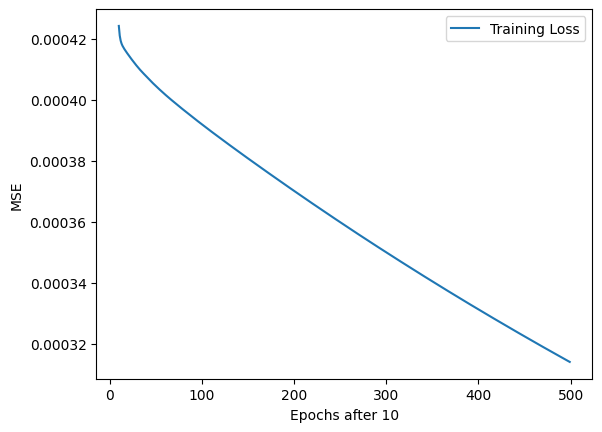

In [18]:
training_errors = ann1.fit(X_train, y_train, epochs=500);

plot_training(training_errors) 

### Predict
Predict the results on the training and test data subsets. Again "hat" refers to an estimated value (by the model).

In [19]:
yhat_train = ann1.predict(X_train)
yhat_test =  ann1.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


### Analyze
Remember the training outputs `yhat_train` are made to be nearly equal to the real measurements `y_train` during training. so these two should be very close to each other if training was successful. 

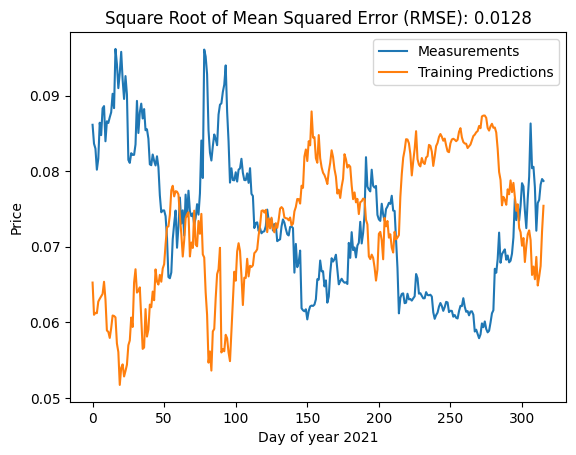

In [20]:
plot_data(y_train, 'Measurements', yhat_train, 'Training Predictions')

The model never saw the `y_test` data during training, so this is a good first attempt at seeing how well it forecasts new data. 

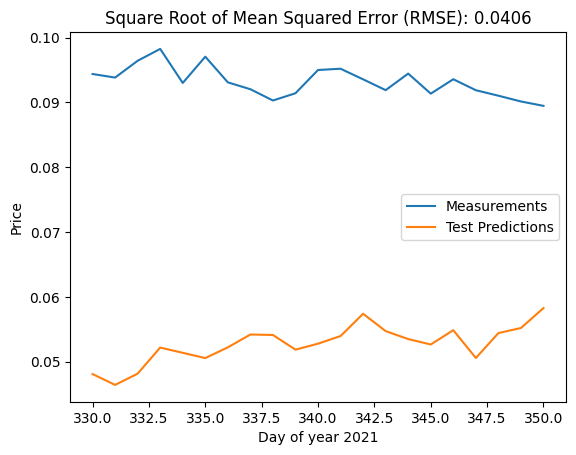

In [21]:
plot_data(y_test, 'Measurements', yhat_test, 'Test Predictions',first_day=330)

# Forecast model (5 layers, 100 neurons each)

### Build

- Build the model with a main ANN layer
- and then one final neuron to reduce the output values to a single number
- `input shape` is just `window size` x `number of features` 
- `n_features` is just 1 because we only have one data vector we're using as an input to the model, the close prices
- notice that for a single point forecast we usually want a last layer with just one neuron
  - to condense all the previous layer outputs to one value
  
Training NB  
- We use the `Adam` optimizer, which is a type of stochastic gradient descent
- There's a loss metric you need to define
- We have done nothing with "validation" (a way to see how well training is going)

In [22]:
N_neurons = 50

ann2 = create_model()

ann2.add(layer(N_neurons, activation='relu', input_dim=L_w))
ann2.add(layer(N_neurons, activation='relu',))
ann2.add(layer(N_neurons, activation='relu',))
ann2.add(layer(N_neurons, activation='relu',))
ann2.add(layer(N_neurons, activation='relu',))

ann2.add(layer(1))

ann2.compile(optimizer = 'Adam', loss = 'mse', )

ann2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 50)             │           750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,001 (42.97 KB)

 Trainable params: 11,001 (42.97 KB)

 Non-trainable params: 0 (0.00 B)

### Train

Train (fit) the model on the training data for 100 epochs (cycles throught the entire dataset). This will perform backpropagation through time.

Epoch 1/1000


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 944us/step - loss: 0.0030
Epoch 2/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - loss: 2.6842e-04
Epoch 3/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - loss: 1.0113e-04
Epoch 4/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - loss: 5.4414e-05
Epoch 5/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - loss: 5.4032e-05
Epoch 6/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - loss: 5.4565e-05
Epoch 7/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - loss: 4.5838e-05
Epoch 8/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - loss: 4.5598e-05
Epoch 9/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - loss: 4.3911e-05
Epoch 10/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - loss: 4.0353e-05
Epoch 11/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - loss: 3.7693e-05
Epoch 12/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - loss: 3.5478e-05
Epoch 13/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - loss: 3.3520e-05
Epoch 14/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - loss: 3

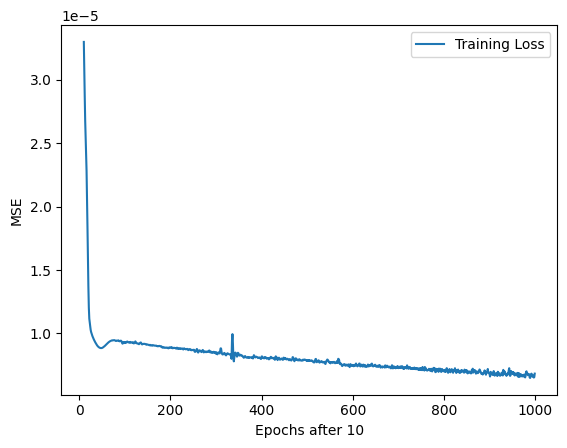

In [23]:
training_errors = ann2.fit(X_train, y_train, epochs=1000);

plot_training(training_errors) 

### Predict
Predict the results on the training and test data subsets. Again "hat" refers to an estimated value (by the model).

In [24]:
yhat_train = ann2.predict(X_train)
yhat_test =  ann2.predict(X_test)

 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


### Analyze
Remember the training outputs `yhat_train` are made to be nearly equal to the real measurements `y_train` during training. so these two should be very close to each other if training was successful. 

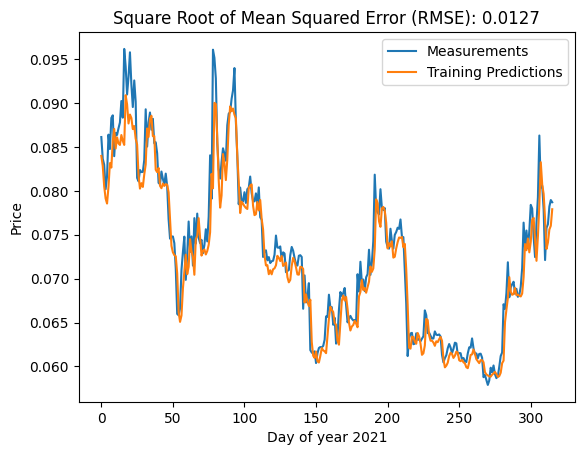

In [25]:
plot_data(y_train, 'Measurements', yhat_train, 'Training Predictions')

The model never saw the `y_test` data during training, so this is a good first attempt at seeing how well it forecasts new data. 

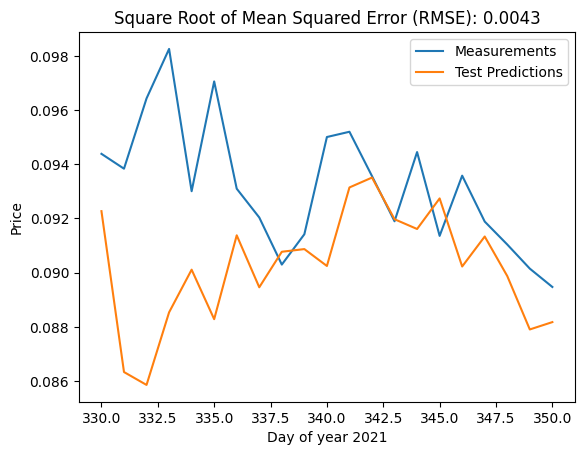

In [26]:
plot_data(y_test, 'Measurements', yhat_test, 'Test Predictions',first_day=330)

# The End